## Setup

In [1]:
from operator import le
import os
from re import T
import shutil
import time
from IPython.display import Image, display
# from xml.etree.ElementTree import PI
import ROOT
ROOT.gROOT.SetBatch(True)  # don't pop up canvases with X11
from pyamptools import atiSetup
atiSetup.setup(globals(), use_fsroot=True)
ROOT.TGaxis.SetMaxDigits(3) # set scientific notation globally
# ROOT.TGaxis.SetExponentOffset(-0.05, 0.01, "y")  # (xoff, yoff, axis)

# ----------------------------------------------------------------------------------
# General skims (made for and supplied to skim script to reduce starting file size)
# ----------------------------------------------------------------------------------

FNGENMC = "/work/halld/home/dbarton/gluex/KShortPipLambda/sdme/files/tree_pipkslamb__B4_M16_M18_GENERAL_SKIM_K892_MC.root"
FNGEN = "/work/halld/home/dbarton/gluex/KShortPipLambda/sdme/files/tree_pipkslamb__B4_M16_M18_GENERAL_SKIM_K892.root"

# ----------------------------------------------------------------------------------
# Sideband and Signal skims (produced by skimming scripts)
# ----------------------------------------------------------------------------------

FNSIG =    "/work/halld/home/dbarton/gluex/KShortPipLambda/sdme/files/tree_pipkslamb__B4_M16_M18_SIGNAL_SKIM_K892.root"
FNSIGMC =  "/work/halld/home/dbarton/gluex/KShortPipLambda/sdme/files/tree_pipkslamb__B4_M16_M18_SIGNAL_SKIM_K892_MC.root"
FNTHROWN = "/work/halld/home/dbarton/gluex/KShortPipLambda/sdme/files/tree_pipkslamb_SIGNAL_SKIM_K892_THROWN.root"
FNSB =     "/work/halld/home/dbarton/gluex/KShortPipLambda/sdme/files/tree_pipkslamb__B4_M16_M18_SIDEBAND_SKIM_K892.root"

# ----------------------------------------------------------------------------------
# Weight trees
# ----------------------------------------------------------------------------------
FNSIGWT = "/work/halld/home/dbarton/gluex/KShortPipLambda/sdme/files/tree_pipkslamb__B4_M16_M18_SIGNAL_SKIM_K892_MC.root.weight"
FNSBWT = "/work/halld/home/dbarton/gluex/KShortPipLambda/sdme/files/tree_pipkslamb__B4_M16_M18_SIDEBAND_SKIM_K892.root.weight"

NT = "ntFSGlueX_MODECODE"
treeName = "ntFSGlueX_100000000_1100"


def gluex_style():
    style = ROOT.TStyle("GlueX", "Default GlueX Style")

    # Canvas / Pad
    style.SetCanvasBorderMode(0)
    style.SetPadBorderMode(0)
    style.SetPadColor(0)
    style.SetCanvasColor(0)
    style.SetTitleColor(0)
    style.SetStatColor(0)

    # Sizes
    style.SetCanvasDefW(800)
    style.SetCanvasDefH(600)
    style.SetPadBottomMargin(0.15)
    style.SetPadLeftMargin(0.20)
    style.SetPadTopMargin(0.05)
    style.SetPadRightMargin(0.08)

    # Axis
    style.SetStripDecimals(0)
    style.SetLabelSize(0.025, "xyz")
    style.SetTitleSize(0.06, "xyz")
    style.SetTitleFont(42, "xyz")
    style.SetLabelFont(42, "xyz")
    style.SetTitleOffset(1.2, "y")
    style.SetLabelOffset(0.08, "xyz")


    # Histograms
    style.SetOptStat(0)
    style.SetOptTitle(0)
    style.SetHistLineWidth(2)
    style.SetHistFillColor(920)  # grey

    # Palettes
    style.SetPalette(ROOT.kViridis)

    ROOT.gROOT.SetStyle("GlueX")
    ROOT.gROOT.ForceStyle()




Welcome to JupyROOT 6.28/06
atiSetup| jupyter-lab called python3.9

------------------------------------------------
atiSetup| MPI is disabled
atiSetup| GPU is disabled
------------------------------------------------


atiSetup| Loading library libIUAmpTools.so ............  ON
atiSetup| Loading library libAmpTools.so ..............  ON
atiSetup| Loading library libAmpPlotter.so ............  ON
atiSetup| Loading library libAmpsDataIO.so ............  ON
atiSetup| Loading library libFSRoot.so ................  ON
atiSetup| Loading library libAmpsGen.so ...............  OFF


------------------------------------------------
------------------------------------------------

atiSetup| minor warning: Unable to alias omegapiAngles - doesn't exist under ROOT namespace
atiSetup| minor warning: Unable to alias URtypes - doesn't exist under ROOT namespace
atiSetup| minor warning: Unable to alias URConfig - doesn't exist under ROOT namespace
atiSetup| minor warning: Unable to alias FSFitPrivate

## Plot each skim output

### KShort

In [ ]:
# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)  2b. PiMinus1 (5)
# 3. PiPlus1 (6)

# Define string labels

# DecayingLambda = "1"
# Proton         = "1a"
# PiMinus2       = "1b"
# DecayingKShort = "2"
# PiPlus2        = "2a"
# PiMinus1       = "2b"
# PiPlus1        = "3"

# Toggle BGGEN overlays
bggen = False

def setup():
    startTime = time.time()
    # include the gluex_style
    gluex_style()
    # Early out if already configured
    # if ROOT.FSModeCollection.modeVector().size() != 0:
    #     return
    # ROOT.FSHistogram.readHistogramCache()
    ROOT.FSModeCollection.addModeInfo("100000000_1100").addCategory("m100000000_1100")

    # -----------------------------
    # Output directory / file
    # -----------------------------
    # shutil.rmtree("plots", ignore_errors=True)
    # os.makedirs("plots", exist_ok=True)
    # plotsFileName = "plots/skim_plots.pdf"
    img_path = "/work/halld/home/dbarton/gluex/KShortPipLambda/plots/skim_plots_ks"

    # -----------------------------
    # Histogram label
    # -----------------------------
    label = "Skimmed files"
    lab1 = ROOT.TLatex()
    lab1.SetNDC(True)
    lab1.SetTextAlign(23)   # 23 = center/top
    lab1.SetTextFont(62)    # bold
    lab1.SetTextSize(0.045)

    c1 = ROOT.TCanvas("c1", "c1", 1600, 1200)
    c1.Divide(1, 1)

    # clear histogram cache
    ROOT.FSHistogram.clearHistogramCache()

    c1.cd(1)
    hKShort1 = ROOT.FSModeHistogram.getTH1F(FNSIG, NT, "m100000000_1100", "MASS(2)", "(60,0.35,0.65)", "CUT()")
    hKShort2 = ROOT.FSModeHistogram.getTH1F(FNSIGMC, NT, "m100000000_1100", "MASS(2)", "(60,0.35,0.65)", "CUT()")
    hKShort3 = ROOT.FSModeHistogram.getTH1F(FNTHROWN, NT, "m100000000_1100", "MCMASS(2)", "(60,0.35,0.65)", "CUT()")
    hKShort4 = ROOT.FSModeHistogram.getTH1F(FNSB, NT, "m100000000_1100", "MASS(2)", "(60,0.35,0.65)", "CUT()")
    
    hKShort3.SetTitle("Skim plots")
    hKShort3.SetXTitle("M(#pi^{+} #pi^{-})  [GeV/c^{2}]")
    hKShort3.SetLineColor(ROOT.kRed)
    hKShort3.SetFillColor(ROOT.kRed)
    # hKShort3.SetFillStyle(3005)
    hKShort3.Scale(0.03)  # scale gen down for visibility
    hKShort3.Draw("hist")
    
    hKShort4.SetLineColor(ROOT.kMagenta)
    hKShort4.SetFillColor(ROOT.kMagenta)
    hKShort4.SetFillStyle(3006)
    hKShort4.Draw("same hist")
    
    hKShort1.SetLineColor(ROOT.kBlack)
    hKShort1.SetYTitle("Counts / 5 MeV")
    hKShort1.SetMinimum(0.0)
    hKShort1.Draw("same")

    hKShort2.SetLineColor(ROOT.kBlack)
    hKShort2.SetFillColor(ROOT.kBlack)
    # hKShort2.SetFillStyle(3005)
    hKShort2.Draw("same hist")

    # compute integrals for legend
    int1 = hKShort1.Integral()
    int2 = hKShort2.Integral()
    int3 = hKShort3.Integral()
    int4 = hKShort4.Integral()

    legendKShort = ROOT.TLegend(0.62, 0.62, 0.94, 0.85)
    legendKShort.AddEntry(hKShort1, f"Signal Data: {int1:.0f}", "l")
    legendKShort.AddEntry(hKShort2, f"Signal MC: {int2:.0f}", "l")
    legendKShort.AddEntry(hKShort3, f"Gen MC (scaled x 0.03): {int3:.0f}", "l")
    legendKShort.AddEntry(hKShort4, f"SB Data: {int4:.0f}", "l")
    legendKShort.Draw("same")
    lab1.DrawLatex(0.5, 1.00, f"{label}")
    ROOT.gPad.Update()

    c1.SaveAs(img_path + '.pdf')
    c1.SaveAs(img_path + '.png')
    c1.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')
    

    endTime = time.time()
    print(f"Time to run: {endTime - startTime:.1f} seconds")

if __name__ == "__main__":
    setup()

### Lambda

In [ ]:
# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)  2b. PiMinus1 (5)
# 3. PiPlus1 (6)

# Define string labels

# DecayingLambda = "1"
# Proton         = "1a"
# PiMinus2       = "1b"
# DecayingKShort = "2"
# PiPlus2        = "2a"
# PiMinus1       = "2b"
# PiPlus1        = "3"

# Toggle BGGEN overlays
bggen = False

def setup():
    startTime = time.time()
    # include the gluex_style
    gluex_style()
    # Early out if already configured
    # if ROOT.FSModeCollection.modeVector().size() != 0:
    #     return
    # ROOT.FSHistogram.readHistogramCache()
    ROOT.FSModeCollection.addModeInfo("100000000_1100").addCategory("m100000000_1100")

    # -----------------------------
    # Histogram label
    # -----------------------------
    label = "Skimmed files"
    lab1 = ROOT.TLatex()
    lab1.SetNDC(True)
    lab1.SetTextAlign(23)   # 23 = center/top
    lab1.SetTextFont(62)    # bold
    lab1.SetTextSize(0.045)

    # -----------------------------
    # Output file
    # -----------------------------
    img_path = "/work/halld/home/dbarton/gluex/KShortPipLambda/plots/skim_plots_lamb"

    c1 = ROOT.TCanvas("c1", "c1", 1600, 1200)
    c1.Divide(1, 1)

    # clear histogram cache
    ROOT.FSHistogram.clearHistogramCache()

    c1.cd(1)
    hKShort1 = ROOT.FSModeHistogram.getTH1F(FNSIG, NT, "m100000000_1100", "MASS(1)", "(60,1.08,1.18)", "CUT()")
    hKShort2 = ROOT.FSModeHistogram.getTH1F(FNSIGMC, NT, "m100000000_1100", "MASS(1)", "(60,1.08,1.18)", "CUT()")
    hKShort3 = ROOT.FSModeHistogram.getTH1F(FNTHROWN, NT, "m100000000_1100", "MCMASS(1)", "(60,1.08,1.18)", "CUT()")
    hKShort4 = ROOT.FSModeHistogram.getTH1F(FNSB, NT, "m100000000_1100", "MASS(1)", "(60,1.08,1.18)", "CUT()")
    
    hKShort3.SetTitle("Skim plots")
    hKShort3.SetXTitle("M(p #pi^{-})  [GeV/c^{2}]")
    hKShort3.SetLineColor(ROOT.kRed)
    hKShort3.SetFillColor(ROOT.kRed)
    # hKShort3.SetFillStyle(3005)
    hKShort3.Scale(0.03)  # scale gen down for visibility
    hKShort3.Draw("hist")
    
    hKShort4.SetLineColor(ROOT.kMagenta)
    hKShort4.SetFillColor(ROOT.kMagenta)
    hKShort4.SetFillStyle(3006)
    hKShort4.Draw("same hist")
    
    hKShort1.SetLineColor(ROOT.kBlack)
    hKShort1.SetYTitle("Counts / 5 MeV")
    hKShort1.SetMinimum(0.0)
    hKShort1.Draw("same")

    hKShort2.SetLineColor(ROOT.kBlack)
    hKShort2.SetFillColor(ROOT.kBlack)
    # hKShort2.SetFillStyle(3005)
    hKShort2.Draw("same hist")

    # compute integrals for legend
    int1 = hKShort1.Integral()
    int2 = hKShort2.Integral()
    int3 = hKShort3.Integral()
    int4 = hKShort4.Integral()

    legendKShort = ROOT.TLegend(0.62, 0.62, 0.94, 0.85)
    legendKShort.AddEntry(hKShort1, f"Signal Data: {int1:.0f}", "l")
    legendKShort.AddEntry(hKShort2, f"Signal MC: {int2:.0f}", "l")
    legendKShort.AddEntry(hKShort3, f"Gen MC (scaled x 0.03): {int3:.0f}", "l")
    legendKShort.AddEntry(hKShort4, f"SB Data: {int4:.0f}", "l")
    legendKShort.Draw("same")
    lab1.DrawLatex(0.5, 1.00, f"{label}")
    ROOT.gPad.Update()

    c1.SaveAs(img_path + '.pdf')
    c1.SaveAs(img_path + '.png')
    c1.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')
    

    endTime = time.time()
    print(f"Time to run: {endTime - startTime:.1f} seconds")

if __name__ == "__main__":
    setup()

### Bachelor π+

In [ ]:
# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)  2b. PiMinus1 (5)
# 3. PiPlus1 (6)

# Define string labels

# DecayingLambda = "1"
# Proton         = "1a"
# PiMinus2       = "1b"
# DecayingKShort = "2"
# PiPlus2        = "2a"
# PiMinus1       = "2b"
# PiPlus1        = "3"

# Toggle BGGEN overlays
bggen = False

def setup():
    startTime = time.time()
    # include the gluex_style
    gluex_style()
    # Early out if already configured
    # if ROOT.FSModeCollection.modeVector().size() != 0:
    #     return
    # ROOT.FSHistogram.readHistogramCache()
    ROOT.FSModeCollection.addModeInfo("100000000_1100").addCategory("m100000000_1100")

    # -----------------------------
    # Histogram label
    # -----------------------------
    label = "Skimmed files"
    lab1 = ROOT.TLatex()
    lab1.SetNDC(True)
    lab1.SetTextAlign(23)   # 23 = center/top
    lab1.SetTextFont(62)    # bold
    lab1.SetTextSize(0.045)

    # -----------------------------
    # Output file
    # -----------------------------
    img_path = "/work/halld/home/dbarton/gluex/KShortPipLambda/plots/skim_plots_pip"

    c1 = ROOT.TCanvas("c1", "c1", 1600, 1200)
    c1.Divide(1, 1)

    # clear histogram cache
    ROOT.FSHistogram.clearHistogramCache()

    c1.cd(1)
    hKShort1 = ROOT.FSModeHistogram.getTH1F(FNSIG, NT, "m100000000_1100", "MASS(3)", "(60,0.13,0.15)", "CUT()")
    hKShort2 = ROOT.FSModeHistogram.getTH1F(FNSIGMC, NT, "m100000000_1100", "MASS(3)", "(60,0.13,0.15)", "CUT()")
    hKShort3 = ROOT.FSModeHistogram.getTH1F(FNTHROWN, NT, "m100000000_1100", "MCMASS(3)", "(60,0.13,0.15)", "CUT()")
    hKShort4 = ROOT.FSModeHistogram.getTH1F(FNSB, NT, "m100000000_1100", "MASS(3)", "(60,0.13,0.15)", "CUT()")
    
    hKShort3.SetTitle("Skim plots")
    hKShort3.SetXTitle("M(#pi^{+})_{bachelor}  [GeV/c^{2}]")
    hKShort3.SetLineColor(ROOT.kRed)
    hKShort3.SetFillColor(ROOT.kRed)
    hKShort3.Scale(0.03)  # scale gen down for visibility
    hKShort3.GetXaxis().SetNdivisions(505)
    hKShort3.Draw("hist")
    
    hKShort4.SetLineColor(ROOT.kMagenta)
    hKShort4.SetFillColor(ROOT.kMagenta)
    hKShort4.SetFillStyle(3006)
    hKShort4.Draw("same hist")
    
    hKShort1.SetLineColor(ROOT.kBlack)
    hKShort1.SetYTitle("Counts / 5 MeV")
    hKShort1.SetMinimum(0.0)
    hKShort1.Draw("same")

    hKShort2.SetLineColor(ROOT.kBlack)
    hKShort2.SetFillColor(ROOT.kBlack)
    # hKShort2.SetFillStyle(3005)
    hKShort2.Draw("same hist")

    # compute integrals for legend
    int1 = hKShort1.Integral()
    int2 = hKShort2.Integral()
    int3 = hKShort3.Integral()
    int4 = hKShort4.Integral()

    legendKShort = ROOT.TLegend(0.62, 0.62, 0.94, 0.85)
    legendKShort.AddEntry(hKShort1, f"Signal Data: {int1:.0f}", "l")
    legendKShort.AddEntry(hKShort2, f"Signal MC: {int2:.0f}", "l")
    legendKShort.AddEntry(hKShort3, f"Gen MC (scaled x 0.03): {int3:.0f}", "l")
    legendKShort.AddEntry(hKShort4, f"SB Data: {int4:.0f}", "l")
    legendKShort.Draw("same")
    lab1.DrawLatex(0.5, 1.00, f"{label}")
    ROOT.gPad.Update()

    c1.SaveAs(img_path + '.pdf')
    c1.SaveAs(img_path + '.png')
    c1.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')
    

    endTime = time.time()
    print(f"Time to run: {endTime - startTime:.1f} seconds")

if __name__ == "__main__":
    setup()

### Cos(Θ)_GJ

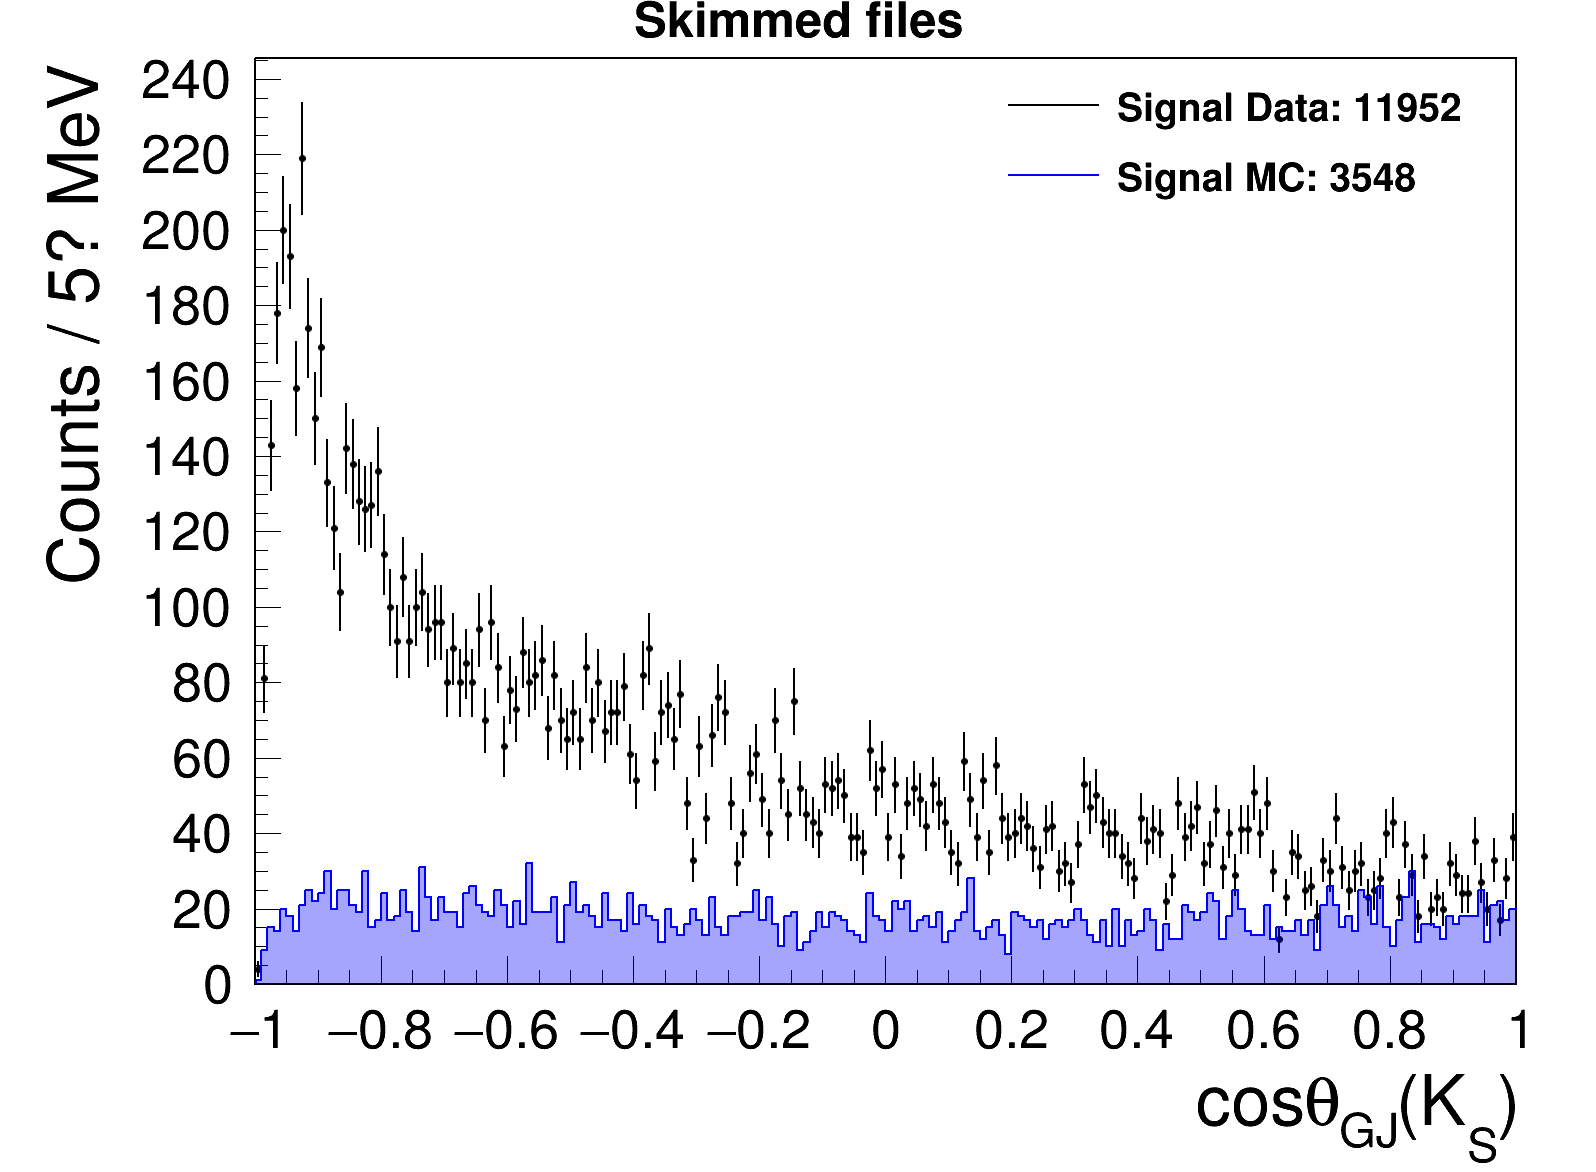

Time to run: 1.7 seconds
    CREATING HISTOGRAM... FSRootHist:000001   100000000_1100    OKAY           (entries = 11952)
    CREATING HISTOGRAM... FSRootHist:000002   100000000_1100    OKAY           (entries = 3548)


Info in <TCanvas::Print>: pdf file /work/halld/home/dbarton/gluex/KShortPipLambda/plots/skim_plots_CosThetaGJ_KS.pdf has been created
Info in <TCanvas::Print>: png file /work/halld/home/dbarton/gluex/KShortPipLambda/plots/skim_plots_CosThetaGJ_KS.png has been created


In [3]:
# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)  2b. PiMinus1 (5)
# 3. PiPlus1 (6)

# Define string labels

# DecayingLambda = "1"
# Proton         = "1a"
# PiMinus2       = "1b"
# DecayingKShort = "2"
# PiPlus2        = "2a"
# PiMinus1       = "2b"
# PiPlus1        = "3"

# Toggle BGGEN overlays
bggen = False

def setup():
    startTime = time.time()
    # include the gluex_style
    gluex_style()
    # Early out if already configured
    # if ROOT.FSModeCollection.modeVector().size() != 0:
    #     return
    # ROOT.FSHistogram.readHistogramCache()
    ROOT.FSModeCollection.addModeInfo("100000000_1100").addCategory("m100000000_1100")

    # -----------------------------
    # Histogram label
    # -----------------------------
    label = "Skimmed files"
    lab1 = ROOT.TLatex()
    lab1.SetNDC(True)
    lab1.SetTextAlign(23)   # 23 = center/top
    lab1.SetTextFont(62)    # bold
    lab1.SetTextSize(0.045)

    # -----------------------------
    # Output file
    # -----------------------------
    img_path = "/work/halld/home/dbarton/gluex/KShortPipLambda/plots/skim_plots_CosThetaGJ_KS"

    c1 = ROOT.TCanvas("c1", "c1", 1600, 1200)

    # clear histogram cache
    ROOT.FSHistogram.clearHistogramCache()

    hCosThetaGJ_KS_dataSig = ROOT.FSModeHistogram.getTH1F(FNSIG, NT, "m100000000_1100", "GJCOSTHETA(2a,2b;3;GLUEXBEAM)", "(200,-1.00,1.00)", "CUT()")
    hCosThetaGJ_KS_MCsig = ROOT.FSModeHistogram.getTH1F(FNSIGMC, NT, "m100000000_1100", "GJCOSTHETA(2a,2b;3;GLUEXBEAM)", "(200,-1.00,1.00)", "CUT()")
    # hKShort3 = ROOT.FSModeHistogram.getTH1F(FNTHROWN, NT, "m100000000_1100", "MCGJCOSTHETA(2;3;MCGLUEXBEAM)", "(200,-1.00,1.00)", "CUT()")
    # hCosThetaGJ_KS_bkg = ROOT.FSModeHistogram.getTH1F(FNSB, NT, "m100000000_1100", "GJCOSTHETA(2a,2b;3;GLUEXBEAM)", "(200,-1.00,1.00)", "CUT()")
    
    hCosThetaGJ_KS_dataSig.SetTitle("Skim plots")
    hCosThetaGJ_KS_dataSig.SetXTitle("cos#theta_{GJ}(K_{S})")
    hCosThetaGJ_KS_dataSig.SetLineColor(ROOT.kBlack)
    hCosThetaGJ_KS_dataSig.SetYTitle("Counts / 5? MeV")
    # hKShort1.SetMinimum(0.0)
    hCosThetaGJ_KS_dataSig.Draw("")

    hCosThetaGJ_KS_MCsig.SetLineColor(ROOT.kBlue)
    hCosThetaGJ_KS_MCsig.SetFillColor(ROOT.kBlue)
    hCosThetaGJ_KS_MCsig.SetFillColorAlpha(ROOT.kBlue, 0.35)
    hCosThetaGJ_KS_MCsig.Draw("hist same")

    # hCosThetaGJ_KS_bkg.SetLineColor(ROOT.kRed)
    # hCosThetaGJ_KS_bkg.SetFillColor(ROOT.kRed)
    # hCosThetaGJ_KS_bkg.SetFillColorAlpha(ROOT.kRed, 0.35)
    # hCosThetaGJ_KS_bkg.Draw("hist same")

    # compute integrals for legend
    int1 = hCosThetaGJ_KS_dataSig.Integral()
    int2 = hCosThetaGJ_KS_MCsig.Integral()
    # int3 = hKShort3.Integral()
    # int4 = hCosThetaGJ_KS_bkg.Integral()

    legendKShort = ROOT.TLegend(0.62, 0.82, 0.94, 0.94)
    legendKShort.AddEntry(hCosThetaGJ_KS_dataSig, f"Signal Data: {int1:.0f}", "l")
    legendKShort.AddEntry(hCosThetaGJ_KS_MCsig, f"Signal MC: {int2:.0f}", "l")
    # legendKShort.AddEntry(hKShort3, f"Gen MC (scaled x 0.03): {int3:.0f}", "f")
    # legendKShort.AddEntry(hCosThetaGJ_KS_bkg, f"SB Data: {int4:.0f}", "f")
    legendKShort.Draw("same")
    lab1.DrawLatex(0.5, 1.00, f"{label}")
    ROOT.gPad.Update()

    c1.SaveAs(img_path + '.pdf')
    c1.SaveAs(img_path + '.png')
    c1.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')
    

    endTime = time.time()
    print(f"Time to run: {endTime - startTime:.1f} seconds")

if __name__ == "__main__":
    setup()

## Weights

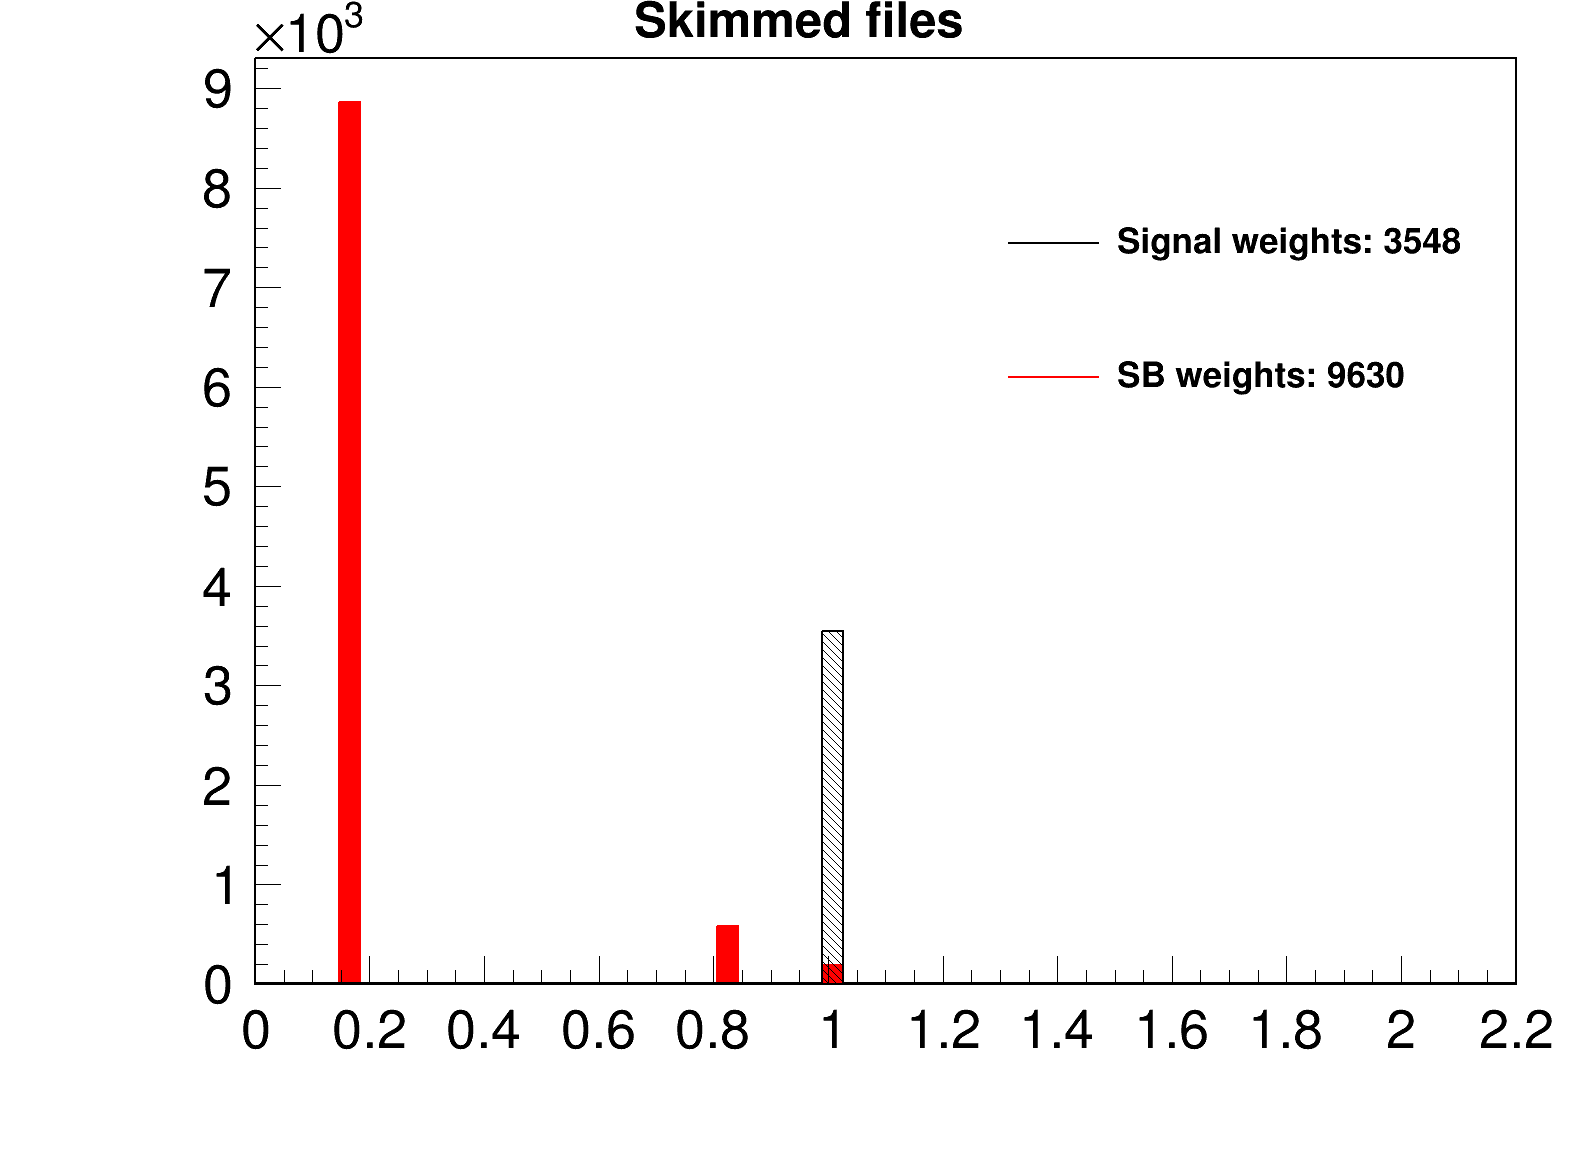

Time to run: 0.4 seconds


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file /work/halld/home/dbarton/gluex/KShortPipLambda/plots/skim_plots_weights.pdf has been created
Info in <TCanvas::Print>: png file /work/halld/home/dbarton/gluex/KShortPipLambda/plots/skim_plots_weights.png has been created


In [4]:
# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus2 (2)
# 2. DecayingKShort (3)   2a. PiPlus2 (4)  2b. PiMinus1 (5)
# 3. PiPlus1 (6)

# Define string labels

# DecayingLambda = "1"
# Proton         = "1a"
# PiMinus2       = "1b"
# DecayingKShort = "2"
# PiPlus2        = "2a"
# PiMinus1       = "2b"
# PiPlus1        = "3"

# Toggle BGGEN overlays
bggen = False

def setup():
    startTime = time.time()
    # include the gluex_style
    gluex_style()
    # Early out if already configured
    # if ROOT.FSModeCollection.modeVector().size() != 0:
    #     return
    # ROOT.FSHistogram.readHistogramCache()
    # ROOT.FSModeCollection.addModeInfo("100000000_1100").addCategory("m100000000_1100")

    # -----------------------------
    # Output directory / file
    # -----------------------------
    # shutil.rmtree("plots", ignore_errors=True)
    # os.makedirs("plots", exist_ok=True)
    # plotsFileName = "plots/skim_plots.pdf"
    img_path = "/work/halld/home/dbarton/gluex/KShortPipLambda/plots/skim_plots_weights"

    # -----------------------------
    # Histogram label
    # -----------------------------
    label = "Skimmed files"
    lab1 = ROOT.TLatex()
    lab1.SetNDC(True)
    lab1.SetTextAlign(23)   # 23 = center/top
    lab1.SetTextFont(62)    # bold
    lab1.SetTextSize(0.045)

    c1 = ROOT.TCanvas("c1", "c1", 1600, 1200)
    c1.Divide(1, 1)

    # clear histogram cache
    ROOT.FSHistogram.clearHistogramCache()

    f1 = ROOT.TFile.Open(FNSIGWT)
    t1 = f1.Get("ntFSGlueX_100000000_1100_weight")

    f2 = ROOT.TFile.Open(FNSBWT)
    t2 = f2.Get("ntFSGlueX_100000000_1100_weight")

    h1 = ROOT.TH1F("h1","weights",60,0,2.2)
    h1.SetFillColor(ROOT.kBlack)
    h1.SetFillStyle(3005)
    h2 = ROOT.TH1F("h2","weights",60,0,2.2)

    t2.Draw("weight>>h2")
    t1.Draw("weight>>h1")

    h1.SetLineColor(ROOT.kBlack)
    h2.SetLineColor(ROOT.kRed)
    h2.SetFillColor(ROOT.kRed)
    # h2.SetFillStyle(3005)

    h2.Draw("hist")
    h1.Draw("hist same")

    # compute integrals for legend
    int1 = h1.Integral()
    int2 = h2.Integral()

    legendKShort = ROOT.TLegend(0.62, 0.62, 0.94, 0.85)
    legendKShort.AddEntry(h1, f"Signal weights: {int1:.0f}", "l")
    legendKShort.AddEntry(h2, f"SB weights: {int2:.0f}", "l")
    legendKShort.Draw("same")
    lab1.DrawLatex(0.5, 1.00, f"{label}")
    ROOT.gPad.Update()

    c1.SaveAs(img_path + '.pdf')
    c1.SaveAs(img_path + '.png')
    c1.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

    endTime = time.time()
    print(f"Time to run: {endTime - startTime:.1f} seconds")

if __name__ == "__main__":
    setup()

## Debugging

### filepaths in FIT output files
### absolute filepaths to actuall trees on farm